# Data Exploration
In this notebook we understand how the data is organized and explore basic features of the data.

In [1]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math
from datetime import datetime
from nltk.stem.snowball import EnglishStemmer


sns.set_theme(style="darkgrid")



In [2]:
#import data
df_tw  = pd.read_csv("Data/auspol2019.csv")
df_geo = pd.read_csv("Data/location_geocode.csv")

In [3]:
df_tw.sample(10)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
63189,2019-05-18 10:56:15,1129702230339096577,Peter Van Olsen is declaring a national electi...,0.0,1.0,2.371455e+07,Indi Wood,indiwood,"currently the Radio Coordinator at NGMedia, fo...","Wingellina, WA",2009-03-11 03:21:00
167726,2019-05-18 03:52:43,1129595645109473280,#ausvotes https://t.co/gnwBedOxvy,0.0,6.0,4.288312e+09,TOADETTE FAN ACCOUNT 🍄🎀,thehelpfulbees,"hi, i'm autumn! | programmer, speedrunner, mat...","perth, australia",2015-11-19 09:13:58
85854,2019-05-17 05:13:56,1129253697567854592,I sang with the choir when Bob Hawke conducted...,0.0,1.0,1.084969e+18,🎶Narelle Vance Perry 🐈🎵,NarelleVance,"Heritage, choirs, politics, books, cats, envir...","Sydney, New South Wales",2019-01-15 00:21:59
27374,2019-05-13 08:21:17,1127851292800557056,BEFORE YOU VOTE YOU MUST READ THIS\n\nIf you b...,1.0,1.0,1.166973e+09,Mike Holt,AdvanceAusHQ,NaN,"Buderim, Qld",2013-02-10 20:46:55
37464,2019-05-19 22:12:31,1130234807449866240,@craigthomler @TurnbullMalcolm @ScottMorrisonM...,0.0,0.0,9.559586e+07,The Fat Man,thefatmansrant,One happy fat man with an opinion on most thin...,AUSTRALIA - still the best,2009-12-09 06:55:48
41893,2019-05-19 06:27:28,1129996978610352128,"Dear AUS PM @ScottMorrisonMP,\nWhat use is an ...",6.0,9.0,2.608741e+09,Peter Murphy #ILikeBillShorten,PeterWMurphy1,Supports human rights (incl. gender equality &...,"Sydney, Australia",2014-07-07 02:21:14
24717,2019-05-15 03:34:03,1128503783145689089,Federal election 2019: Engineering on the ball...,0.0,0.0,6.204731e+08,Engineering show,Engineeringshow,We deliver the latest Engineering news everyday.,"USA, Massachusetts",2012-06-28 00:20:21
31253,2019-05-20 09:12:47,1130400970070904832,Of all the hot takes on how ScoMo connected wi...,1.0,6.0,2.563424e+09,David Stone,BronniesDogPack,Soothsayer,Brisbane,2014-06-12 13:22:44
134598,2019-05-12 05:37:01,1127447565018861569,For anyone who takes Scott Morrison seriously....,0.0,3.0,2.619186e+09,TimeStorm,StormingTime,"Steve Harrison, genre-fluid author of the time...",Sydney Australia,2014-07-11 22:50:07
151962,2019-05-18 15:46:41,1129775322335891456,Tonight my thoughts are with the human beings ...,0.0,2.0,3.207533e+08,Dean Levitan,Dean_Team,Media Lawyer. Director @StandUpOz. Views are m...,"Melbourne, Victoria",2011-06-20 13:31:10


In [4]:
df_geo.sample(10)

,name,lat,long
284,INDIA,20.593684,78.962880
10660,Australia | India | USA,37.090240,-95.712891
1671,"Binningup WA, Noongar land.",-33.149000,115.689000
2467,日本 東京,35.680400,139.769017
4310,Kaurna Land / Adelaide AU,-35.020701,138.562987
1132,1133.0,NaN,NaN
3473,"San Marino, CA",34.121397,-118.106459
9016,9017.0,NaN,NaN
9915,"Melb, OZ",-37.813628,144.963058
10748,"Cabarita, NSW (-33.845206,151.",-28.343624,153.573234


Let's understand a few basic properties of the data. On thing that was observed is that there are potential entries that are entered incorrectly. We will find these entries!

In [5]:
#Finding indices of Data that is incorrect/incomplete

potential_bad_indices = []
for index in df_tw.index:
    for col in list(df_tw.columns):
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            potential_bad_indices = potential_bad_indices + [index]
    
    


In [6]:
df_tw.loc[potential_bad_indices].sample(10)
#list(df_tw.columns)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
8794,2019-05-18 20:52:04,1129852173209223168,Right-wing Australian politician Fraser Anning...,0.0,0.0,9.468226e+17,/r/worldnews,r__worldnews,(Unofficial) Subreddit place for major news fr...,NaN,2017-12-29 19:18:05
124432,2019-05-13 11:00:41,1127891408726048768,OMG DID RUPERT MURDOCH PAY THE WRITERS OF GAME...,0.0,4.0,1.959567e+09,Lauren and 2 others,Bin_Chicken95,they're called sandshoes and no one can tell m...,NaN,2013-10-13 23:02:30
136900,2019-05-12 01:46:46,1127389622181326849,@hebblack So has the last 6 years. #auspol,0.0,0.0,2.916395e+09,🍺🍺🍺💧🌊💦👾MarkJacka,themarkjacka,"I provoked it, I'm a provoker....It's what I d...",NaN,2014-12-02 09:29:11
104492,2019-05-15 17:20:42,1128711819386863616,#auspol https://t.co/1VaTJr3Nrf,0.0,0.0,8.836102e+17,Truth Is Coming🙏,HearTrumpets,NaN,NaN,2017-07-08 08:54:22
129363,2019-05-13 00:45:03,1127736480003047424,Many middle class folks in #Warringah have sud...,1.0,4.0,2.435139e+09,💧Rachel,RachelCFO,NaN,NaN,2014-04-09 08:36:17
39580,2019-05-19 10:50:25,1130063151989264384,@SmilingBludger tough - they're going to have ...,0.0,0.0,2.584945e+09,Reynard Foxx,reynardvi,"anarchist, Racists, bigots, ignorami automatic...",NaN,2014-06-24 02:25:46
24587,2019-05-15 05:21:28,1128530817070747649,A vote for LNP is a vote for a coffin for Aust...,0.0,0.0,9.611919e+17,Dimitra Bouzalas,DimitraBouzala1,NaN,NaN,2018-02-07 10:56:27
63163,2019-05-18 10:56:35,1129702315407990789,I hope global warming fists every Queenslander...,0.0,1.0,2.390059e+08,Bredgens,Bredgens,Politics. Policy. Built environment. Civil lib...,NaN,2011-01-16 15:38:04
92869,2019-05-16 11:41:33,1128988855116263424,@davidbewart SFA ? \n\n#Cook\n#CookVotes\n#Aus...,0.0,0.0,2.609170e+08,EmmanuEl Freeman Eido 888-1696-1770-17-Naegaelin,Zanukah,#CynicalRealist #RespectfulDiscussionsOnly #Ba...,NaN,2011-03-04 21:47:59
112141,2019-05-14 23:30:03,1128442381638950912,"@NickFeik Yep, done yesterday. #Vote1Labor to ...",1.0,0.0,1.715727e+09,mira mcnair,McnairMira,NaN,NaN,2013-08-31 13:56:09


We see that a lot of these'NotANumber' entries are in user_location, user_description, which is not a problem. However, there are other entries that are incomplete! We will find this entries next.

In [7]:
bad_indices= []
for index in df_tw.loc[potential_bad_indices].index:
    for col in ['created_at', 'full_text', 'id', 'favorite_count', 'retweet_count','user_created_at']:
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            bad_indices = bad_indices + [index]

In [8]:
df_tw.loc[bad_indices]

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
63778,2019-05-18 10:45:32,1129699533758259201,I see brain dead people #auspol,1.0,1.0,19761704.0,💧Cathleen McVey Eades,cathleen5,Writer/Producer/Director/ Digital editor semi-...,NaN,NaN
63778,2019-05-18 10:45:32,1129699533758259201,I see brain dead people #auspol,1.0,1.0,19761704.0,💧Cathleen McVey Eades,cathleen5,Writer/Producer/Director/ Digital editor semi-...,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clearly see the issues! There is one entry that appears several times, and it is clearly entered incorrectly. We will delete all these entries. We can also see that some these 234 possible incorrect data are because there is no information of the date when the user was created - we can ignore this as it doesn't seem a big problem.

In [9]:
indices_repeated_entry= []
for index in df_tw.loc[bad_indices].index:
    for col in ['created_at', 'full_text', 'id', 'favorite_count', 'retweet_count']:
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            indices_repeated_entry = indices_repeated_entry + [index]

In [10]:
df_tw.loc[indices_repeated_entry].sample(10)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
120508,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84716,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84716,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132389,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84759,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71541,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks that we found the bad indices! Let's double check!

In [11]:
set(df_tw.loc[indices_repeated_entry]['created_at'])

{'Born Glasgow Scotland raised in Aus. A lefty by birthright. RT usually reflects my opinion'}

Looks right! Let's delete these entries!

In [12]:
df_tw = df_tw.drop(indices_repeated_entry)

In [13]:
print("We deleted " + str(len(indices_repeated_entry)) + " entries")

We deleted 432 entries


In [14]:
#init = where we start spliggin , list_up = upperbounds
#This is just a helper to make a plot later
def barplot_prep(dic_dist,init,list_up):
    temp_dic = dic_dist
    number_a = list(temp_dic.values()) #users
    number_b = list(temp_dic.keys()) #likes
    
    ran = [ 0 for i in range(len(list_up) - 1) ]
    ran[0] = [init, list_up[0]+1]
    for j in range(1,len(list_up)-1):
        ran[j] = [list_up[j-1]+1,list_up[j]+1]
    values = [0 for i in range(len(ran) + 1) ]
    labels = [str(r[0]) + '-' + str(r[1]-1) for r in ran] + [">" + str(ran[-1][1]-1)]
    for i in range(len(ran)):
        values[i] = sum( number_a[j] for j in range(len(number_a)) if number_b[j] in range(ran[i][0],ran[i][1]))
    values[-1] = sum([number_a[j] for j in range(len(number_a)) if number_b[j] > ran[-1][1] + 1])
    return labels,values

In [15]:
tweets_by_user = {}
likes_by_user = {}
retweets_by_user = {}
#This should be written better!
for index in df_tw.index:
     likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0
     tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0
     retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0

for index in df_tw.index:
    if (not math.isnan(df_tw.loc[[index]]['user_id'].iloc[0])):
      tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]]+1

      if (not math.isnan(df_tw.loc[[index]]['favorite_count'].iloc[0])):
            likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] + df_tw.loc[[index]]['favorite_count'].iloc[0]

      if (not math.isnan(retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]])):
            retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] + df_tw.loc[[index]]['retweet_count'].iloc[0]




In [16]:
#This can likely be written cleaner! 

basic_info = {  "Number of tweets": len(set(df_tw['id'])), #check no repeated, 

                "Distinct users" : len(set(df_tw['user_id'])),

                "User(s) with most tweets": list(set(df_tw.loc[df_tw['user_id'] == max(tweets_by_user, key = tweets_by_user.get)]['user_name'])) + [tweets_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(tweets_by_user, key = tweets_by_user.get)]['user_id']))[0]]],

                "User(s) with most (total) likes": list(set(df_tw.loc[df_tw['user_id'] == max(likes_by_user, key = likes_by_user.get)]['user_name'])) + [likes_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(likes_by_user, key = likes_by_user.get)]['user_id']))[0]]], 

                "User with most (total) retweets ": list(set(df_tw.loc[df_tw['user_id'] == max(retweets_by_user, key = retweets_by_user.get)]['user_name'])) + [retweets_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(retweets_by_user, key = retweets_by_user.get)]['user_id']))[0]]],

                "Tweet with most retweets": df_tw.loc[ df_tw['retweet_count'] == max(list(df_tw['retweet_count']))]['full_text'].iloc[0] ,

                "Tweet with most likes": df_tw.loc[ df_tw['favorite_count'] == max(list(df_tw['favorite_count']))]['full_text'].iloc[0] ,
                
                "Total Number of Retweets": sum([x for x in list(df_tw['retweet_count']) if not math.isnan(x)]),

                "Total Number of Likes": sum([x for x in list(df_tw['favorite_count']) if not math.isnan(x)]),

                "Average Number of Likes per Tweet": np.mean([x for x in list(df_tw['favorite_count']) if not math.isnan(x)]),

                "Average Number of Retweets per Tweet": np.mean([x for x in list(df_tw['retweet_count']) if not math.isnan(x)]),

                "Average Number of Tweets per User": np.mean(list(tweets_by_user.values())),

                "Average Number of Retweets per User": np.mean(list(retweets_by_user.values())) ,

                "Average Number of Likes per User": np.mean(list(likes_by_user.values())) ,
                
                "Date First Tweet": min([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['created_at'])]), 

                "Date Last Tweet": max([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['created_at'])]),
                
                "Date Oldest User": min([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['user_created_at']) if  type(x) == str]),

                "Date Newest User": max([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['user_created_at']) if  type(x) == str])
                }

In [17]:
distribution_retweet =  dict(collections.Counter(list(df_tw['retweet_count'])))
distribution_likes = dict(collections.Counter(list(df_tw['favorite_count'])) )
distribution_tweets_user = dict(collections.Counter(list(tweets_by_user.values()))) 
distribution_retweets_user = dict(collections.Counter(list(retweets_by_user.values())))
distribution_likes_user  = dict(collections.Counter(list(likes_by_user.values())))

In [18]:
print(pd.Series(basic_info))

Number of tweets                                                                   183370
Distinct users                                                                      45862
User(s) with most tweets                                                [💧 Sur Plus, 937]
User(s) with most (total) likes                                     [Van Badham, 49066.0]
User with most (total) retweets                                     [Van Badham, 14160.0]
Tweet with most retweets                Shocking defeat for Left in Australia, stunned...
Tweet with most likes                   Shocking defeat for Left in Australia, stunned...
Total Number of Retweets                                                         699430.0
Total Number of Likes                                                           2046227.0
Average Number of Likes per Tweet                                               11.159006
Average Number of Retweets per Tweet                                              3.81431
Average Nu

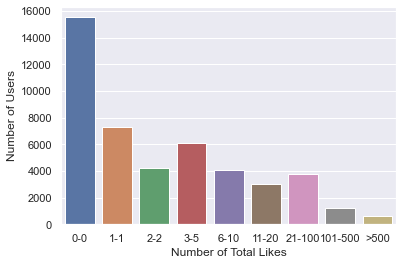

In [19]:
labels, values = barplot_prep(distribution_likes_user, 0,[0,1,2,5,10,20,100,500,1000])
p1 = sns.barplot(x = labels, y = values)
p1.set_xlabel("Number of Total Likes");
p1.set_ylabel("Number of Users");


In [20]:
df_tw.columns

Index(['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_location', 'user_created_at'],
      dtype='object')

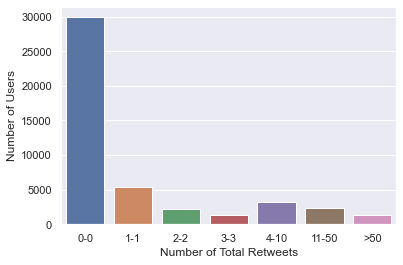

In [21]:

labels, values = barplot_prep(distribution_retweets_user, 0,[0,1,2,3,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Total Retweets");
p2.set_ylabel("Number of Users");

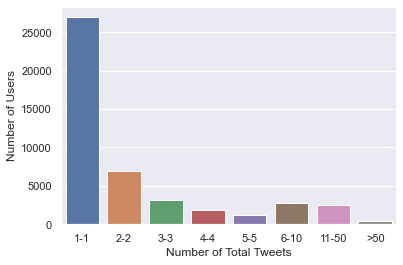

In [22]:
labels, values = barplot_prep(distribution_tweets_user, 1,[1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Total Tweets");
p2.set_ylabel("Number of Users");

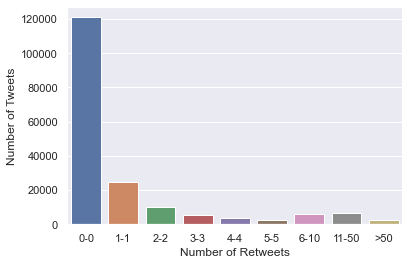

In [23]:
labels, values = barplot_prep(distribution_retweet, 0,[0,1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Retweets");
p2.set_ylabel("Number of Tweets");

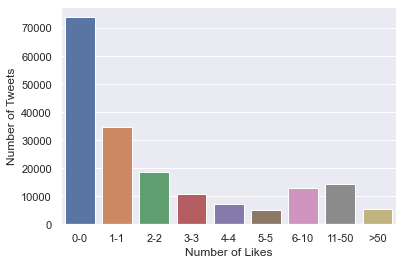

In [24]:
labels, values = barplot_prep(distribution_likes, 0,[0,1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Likes");
p2.set_ylabel("Number of Tweets");

**Some Observations and some things that we can try**
1. We cleaned a little our date. However, there are several entries with 'None' that should be cleaned.
2. Can't tell how accurate are the locations. There are several locations with names like "Next Door", "Nowhere & Everywhere", etc. Maybe these locations should be ignored. We cannot tell how the longitude and latitude where obtained.
3. The names of the user_location are not consistent. One alternative is to use the longitude and latitude to only record the country of origin. 

In [25]:
#This is the data set after deleating some repeated/incorrect entriees
df_tw.to_csv('Data/CleanedData.csv', index=False)